# Implement precipitation

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import re, os
import numpy as np
import xarray as xr
import tensorflow.keras as keras
import datetime
import pdb
import matplotlib.pyplot as plt
from src.utils import *
from src.score import *
from src.data_generator import *
from src.networks import *
from src.train import *
import cartopy.crs as ccrs
import seaborn as sns
from src.regrid import *

## Figure out which CMIP precip to download

In [12]:
era = xr.open_dataset('/data/stephan/WeatherBench/5.625deg/total_precipitation/total_precipitation_1979_5.625deg.nc')

In [8]:
ds = xr.open_dataset('/data/stephan/WeatherBench/CMIP/test/pr_6hrPlev_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001010300-185412312100.nc')

In [9]:
ds.pr

<xarray.DataArray 'pr' (time: 7304, lat: 192, lon: 384)>
[538509312 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T03:00:00 ... 1854-12-31T21:00:00
  * lat      (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  pr
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: replaced missing va...

In [10]:
pr = regrid(ds.pr, 5.625)

Reuse existing file: bilinear_192x384_32x64_peri.nc


In [16]:
pr_m = pr / 997 * 60 * 60

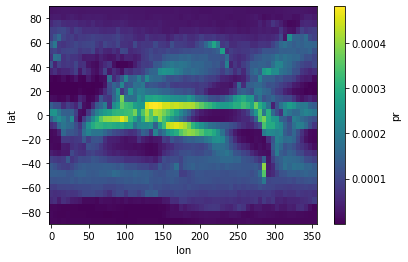

In [19]:
pr_m.mean('time').plot()

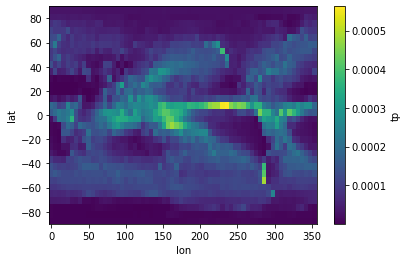

In [21]:
era.tp.mean('time').plot()

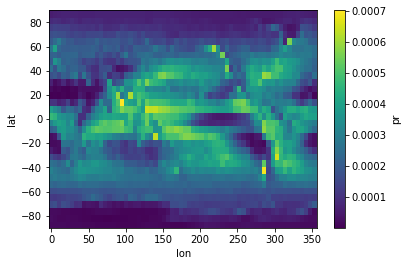

In [22]:
pr_m.std('time').plot()

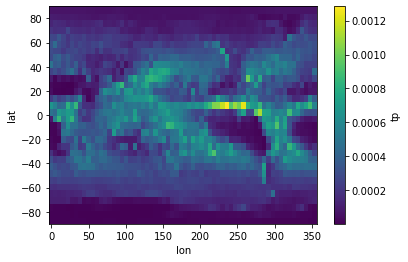

In [23]:
era.tp.std('time').plot()